# Table of Contents

1. [Introduction](#introduction)
2. [Analysis of Aripiprazole](#analysis-of-aripiprazole)
3. [Possible Targets to Look For](#possible-targets-to-look-for)
4. [Package Import](#package-import)
5. [Create API Access for ChEMBL](#create-api-access-for-chembl)
6. [Analysis of Dopamine D2 Receptor](#analysis-of-dopamine-d2-receptor)
    1. [Get Target Information](#get-target-information)
    2. [Select Target of Interest](#select-target-of-interest)
    3. [Save ChEMBL ID of the Target](#save-chembl-id-of-the-target)
    4. [Filter Bioactivities](#filter-bioactivities)
    5. [Process Bioactivities Data](#process-bioactivities-data)
7. [Get Compound Data for Dopamine D2 Assays](#get-compound-data-for-dopamine-d2-assays)
8. [Merge Dataframes](#merge-dataframes)
9. [Analysis of Dopamine D2 Target Data](#analysis-of-dopamine-d2-target-data)

# Analysis of Aripiprazol

> Used under the brand names Abilify and Aristada, is a atypical antipsychotic used in treatment of schizophrenias, bipolar disorder and irritability associated with autism spectrum disorder. 

Aripiprazole is taken by mouth or injection into a muscle

Common Side Effects:

+ Restlessness
+ Insomia
+ Transient weight gain
+ Nausea
+ Vomiting
+ Constipation
+ Dizziness
+ Mild Sedation


## Possible Targets to look for

+ Dopamine ($D_2$) Receptor? Differential engagement?
+ Antagonist $5-HT_{1A}$ receptors and $5-HT_{2A}$ receptors



In [2]:
# Package Import

import math
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt
from tempfile import TemporaryDirectory
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm
import os

/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Create API Acess for Chembl

targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

type(targets_api)

chembl_webresource_client.query_set.QuerySet

### Analysis of Dopamine $(D_2)$ Receptor



In [4]:
uniprot_id = "P14416"

# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')


The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [5]:
# Now we have the information of our target

targets = pd.DataFrame.from_records(targets)
print(targets.head())
print(targets.shape)

       organism                    pref_name target_chembl_id  \
0  Homo sapiens         Dopamine D2 receptor        CHEMBL217   
1  Homo sapiens         Dopamine D2 receptor        CHEMBL217   
2  Homo sapiens  Dopamine receptors; D2 & D3    CHEMBL2095169   
3  Homo sapiens  Dopamine receptors; D2 & D4    CHEMBL2095396   
4  Homo sapiens            Dopamine receptor    CHEMBL2096905   

         target_type  
0     SINGLE PROTEIN  
1     SINGLE PROTEIN  
2  SELECTIVITY GROUP  
3  SELECTIVITY GROUP  
4     PROTEIN FAMILY  
(11, 4)


In [6]:
# Now select the target of interest

target = targets.iloc[0]
target

organism                    Homo sapiens
pref_name           Dopamine D2 receptor
target_chembl_id               CHEMBL217
target_type               SINGLE PROTEIN
Name: 0, dtype: object

In [7]:
# Save the ChembL ID of the target
chembl_id = target['target_chembl_id']
chembl_id

'CHEMBL217'

In [8]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 340, <class 'chembl_webresource_client.query_set.QuerySet'>


In [9]:
ligand_chembl_id = bioactivities[0]['molecule_chembl_id']
ligand_chembl_id

'CHEMBL303519'

In [10]:
bioactivities_df = pd.DataFrame.from_records(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (341, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50,nM,9800.0
1,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50,nM,9800.0
2,33282,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL292943,=,nM,50.0,CHEMBL217,Homo sapiens,IC50,nM,50.0
3,38258,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL61682,=,nM,25.0,CHEMBL217,Homo sapiens,IC50,nM,25.0
4,39387,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL64487,=,nM,360.0,CHEMBL217,Homo sapiens,IC50,nM,360.0


In [11]:
print(len(bioactivities_df))
bioactivities_df.drop(["units","value"], axis=1, inplace=True)
bioactivities_df.head()



341


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50
1,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50
2,33282,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL292943,=,nM,50.0,CHEMBL217,Homo sapiens,IC50
3,38258,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL61682,=,nM,25.0,CHEMBL217,Homo sapiens,IC50
4,39387,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL64487,=,nM,360.0,CHEMBL217,Homo sapiens,IC50


+ Convert Standard Value to Float
+  Delete entries with missing values
+  Keep only entries with standard unit == nM
+  Delete Duplicate Molecules
+  Reset DataFrame Index
+ Rename Columns

In [12]:
# Convert the standard_value column to float64
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes
# Delete Entries with NaN values
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

# Basically do a small filter procedure to remove entries with standard_value = 0
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]

# Drop the duplicates

bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

# Reset Index
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

DataFrame shape: (341, 11)
Units in downloaded data: ['nM']
Number of non-nM entries:    0
DataFrame shape: (295, 11)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,32111,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL303519,=,nM,9800.0,CHEMBL217,Homo sapiens,IC50
1,33282,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL292943,=,nM,50.0,CHEMBL217,Homo sapiens,IC50
2,38258,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL61682,=,nM,25.0,CHEMBL217,Homo sapiens,IC50
3,39387,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL64487,=,nM,360.0,CHEMBL217,Homo sapiens,IC50
4,39391,CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,CHEMBL64597,=,nM,300.0,CHEMBL217,Homo sapiens,IC50


In [13]:
# Finally Rename the Columns to IC50 and standard units to units

bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
#bioactivities_df.head()

print(bioactivities_df.shape) # quite a lot of data

(295, 11)


### Get the Compound Data for the Assays of Dopamine D2

In [14]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

compounds_dopamine_d2 = list(tqdm(compounds_provider))

100%|██████████| 295/295 [00:04<00:00, 63.99it/s]


In [15]:
compounds_dopamine_d2_df = pd.DataFrame.from_records(
    compounds_dopamine_d2,
)
print(f"DataFrame shape: {compounds_dopamine_d2_df.shape}")
compounds_dopamine_d2_df.head()

DataFrame shape: (295, 2)


,molecule_chembl_id,molecule_structures
0,CHEMBL11,{'canonical_smiles': 'CN(C)CCCN1c2ccccc2CCc2cc...
1,CHEMBL411,{'canonical_smiles': 'CC/C(=C(/CC)c1ccc(O)cc1)...
2,CHEMBL415,{'canonical_smiles': 'CN(C)CCCN1c2ccccc2CCc2cc...
3,CHEMBL26,{'canonical_smiles': 'CCN1CCCC1CNC(=O)c1cc(S(N...
4,CHEMBL442,{'canonical_smiles': 'CN1C[C@H](C(=O)N[C@]2(C)...


In [16]:
# Drop possible Dublicates

compounds_dopamine_d2_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_dopamine_d2_df.shape}")

DataFrame shape: (295, 2)


In [17]:
canonical_smiles = []

for i, compounds in compounds_dopamine_d2_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_dopamine_d2_df["smiles"] = canonical_smiles
compounds_dopamine_d2_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_dopamine_d2_df.shape}")

compounds_dopamine_d2_df.head()

DataFrame shape: (295, 2)


,molecule_chembl_id,smiles
0,CHEMBL11,CN(C)CCCN1c2ccccc2CCc2ccccc21
1,CHEMBL411,CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1
2,CHEMBL415,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21
3,CHEMBL26,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC
4,CHEMBL442,CN1C[C@H](C(=O)N[C@]2(C)O[C@@]3(O)[C@@H]4CCCN4...


In [18]:
# emove Compounds without canonical smiles
compounds_dopamine_d2_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_dopamine_d2_df.shape}")

DataFrame shape: (295, 2)


In [19]:
# Merge it all to a big dataframe

output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_dopamine_d2_df,
    on="molecule_chembl_id",
)
# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")
output_df.head()

Dataset with 295 entries.


,molecule_chembl_id,IC50,units,smiles
0,CHEMBL303519,9800.0,nM,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1
1,CHEMBL292943,50.0,nM,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1
2,CHEMBL61682,25.0,nM,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1
3,CHEMBL64487,360.0,nM,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1
4,CHEMBL64597,300.0,nM,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1


## Analysis of Dopamine D2 Target Data

Convert the Data into RDKIT molecules, then also the target and search the compounds



In [21]:
from rdkit import Chem

PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")
target_d2_recept = output_df.copy()
target_d2_recept.head()
print(target_d2_recept.shape)

aripiprazole = Chem.MolFromSmiles("O(CCCCN1CCN(CC1)C2=C(Cl)C(Cl)=CC=C2)C=3C=C4C(=CC3)CCC(=O)N4") 

# Check if aripiprazole is in the dataset
target_d2_recept[target_d2_recept["smiles"] == Chem.MolToSmiles(aripiprazole)]

(295, 5)


,molecule_chembl_id,IC50,units,smiles,ROMol
222,CHEMBL1112,11.0,nM,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,<rdkit.Chem.rdchem.Mol object at 0x7f458afc1430>


/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


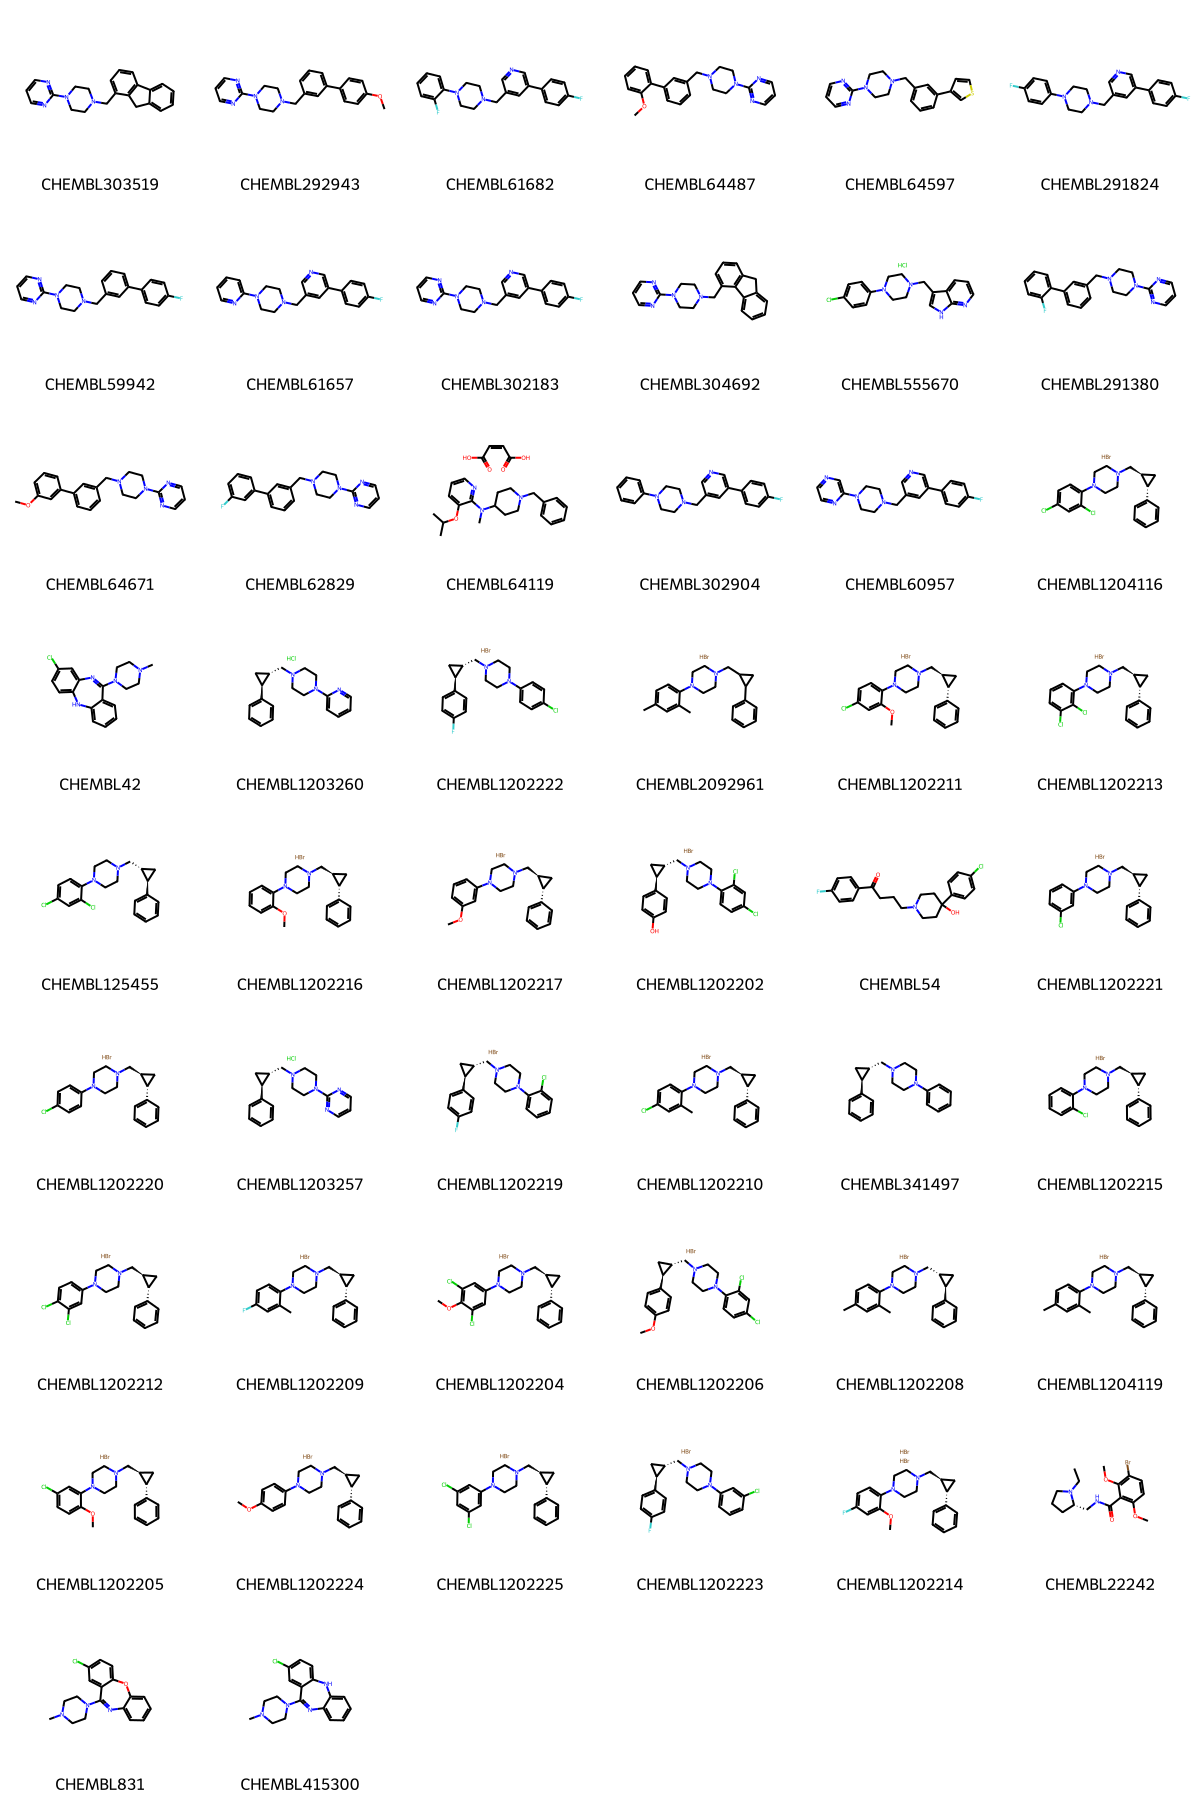

In [22]:
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D, MolsMatrixToGridImage
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem as Chem
# make this strange Allchem object  

# Make a mols list
chembl_id = [str(id) for id in target_d2_recept["molecule_chembl_id"]]

mols = [Chem.MolFromSmiles(smiles) for smiles in target_d2_recept["smiles"]]
MolsToGridImage(mols, molsPerRow=6, subImgSize=(200, 200), legends=chembl_id)

#### IC 50 Analysis

> IC50 gibt die Konzentration eines Inhibitors (in nM) an bei dem eine halbmaximale Inhibition beobachtet wird. Die Dosis Wirkungskurve ist normalerweise sigmoidal, weshalb eine Konzentration mit maximaler Wirkung erst bei vergleichsweise hohen Konzentrationen auftritt. Daher wird der Werd nahe des Wendepunkts genommen

In [23]:
from chembl_webresource_client.new_client import new_client

# Function to get molecule name from ChEMBL ID
# If possible get the Name from Chembl
def get_molecule_name(chembl_id):
    molecule = new_client.molecule.get(chembl_id)
    name = molecule.get("pref_name")
    return name if name else chembl_id

chembl_id = [str(id) for id in target_d2_recept["molecule_chembl_id"]]
molecule_names = [get_molecule_name(id) for id in chembl_id]
target_d2_recept["molecule_name"] = molecule_names
target_d2_recept.head()

,molecule_chembl_id,IC50,units,smiles,ROMol,molecule_name
0,CHEMBL303519,9800.0,nM,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b06bba0>,CHEMBL303519
1,CHEMBL292943,50.0,nM,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b06bc10>,CHEMBL292943
2,CHEMBL61682,25.0,nM,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b0312e0>,CHEMBL61682
3,CHEMBL64487,360.0,nM,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,<rdkit.Chem.rdchem.Mol object at 0x7f458b031270>,CHEMBL64487
4,CHEMBL64597,300.0,nM,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b031350>,CHEMBL64597


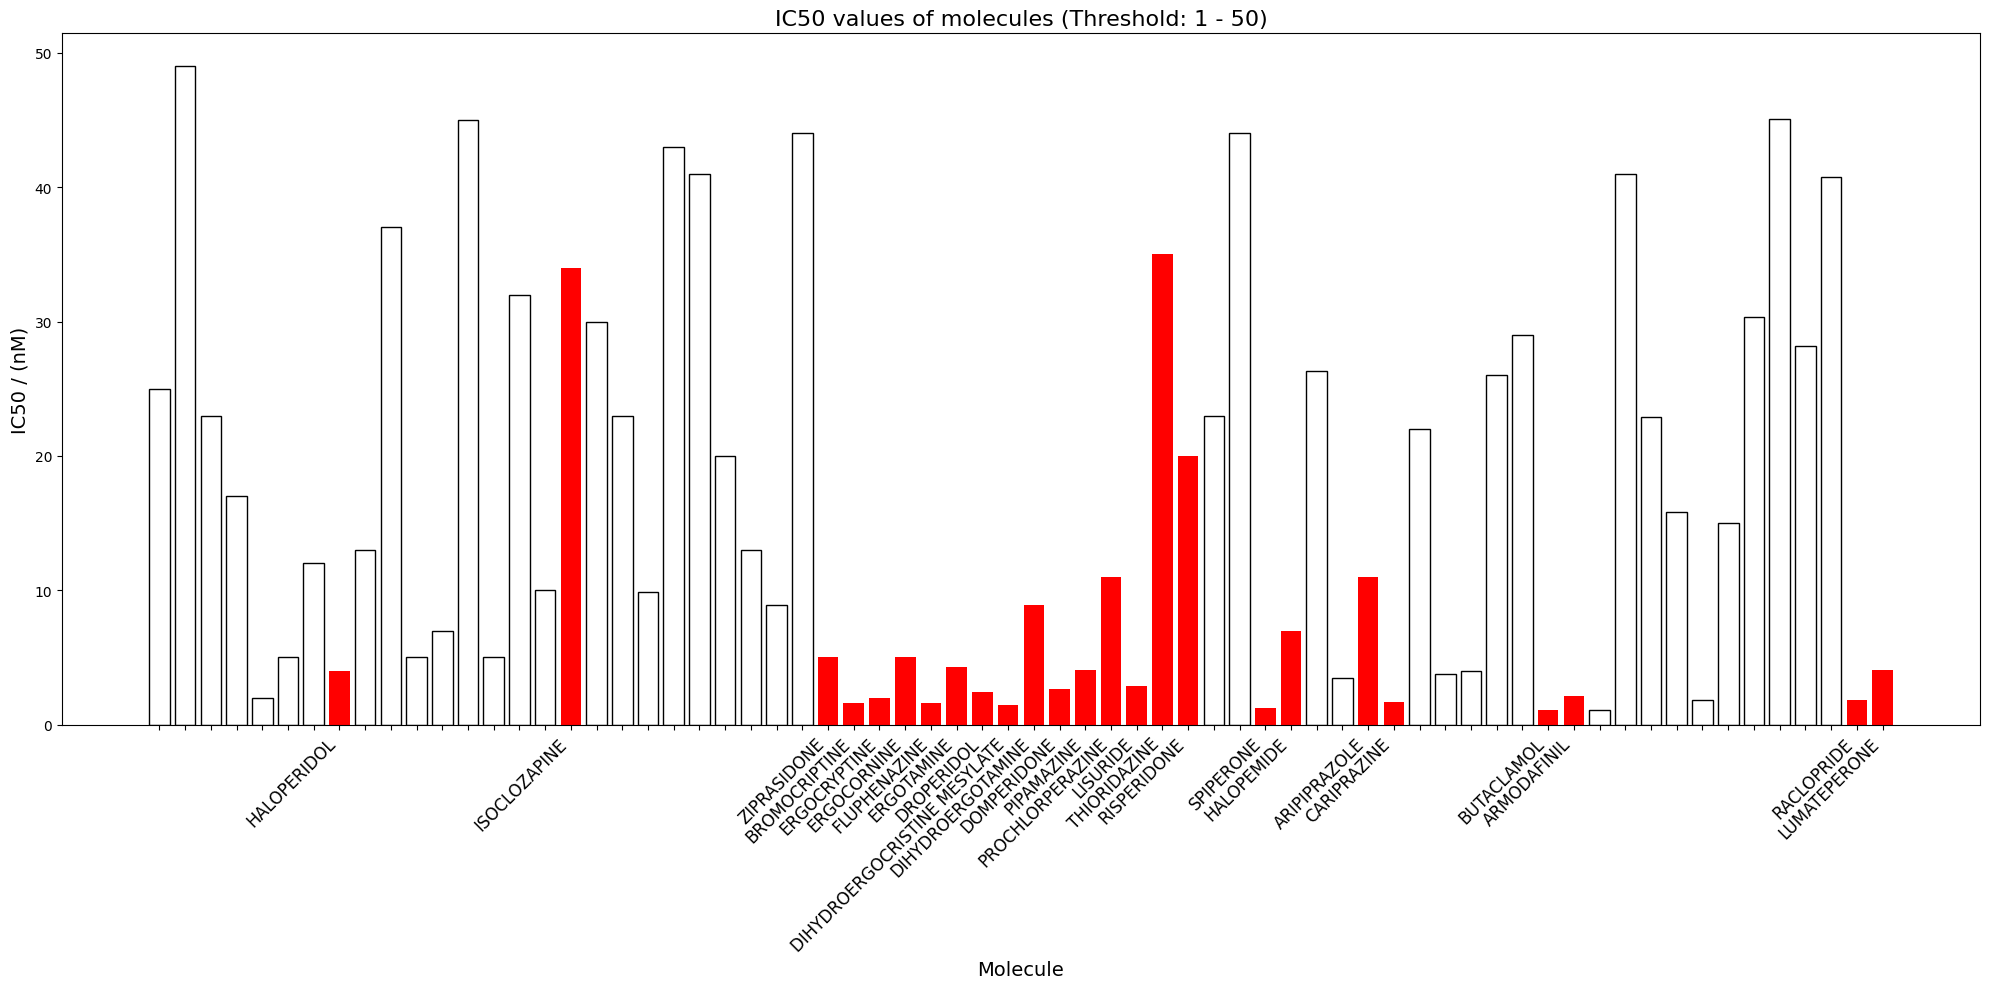

In [24]:
# Filter DataFrame based on threshold value
lower_bound = 1
upper_bound = 50
filtered_df = target_d2_recept[(target_d2_recept['IC50'] < upper_bound) & (target_d2_recept['IC50'] > lower_bound)]


# Plotting
plt.figure(figsize=(20, 10))
bars = plt.bar(filtered_df['molecule_name'], filtered_df['IC50'])
plt.xlabel('Molecule', fontsize=14)
plt.ylabel('IC50 / (nM)', fontsize=14)
plt.title(f'IC50 values of molecules (Threshold: {lower_bound} - {upper_bound})', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Highlight bars with names and hide others
for bar, name in zip(bars, filtered_df["molecule_name"]):
    if name.startswith('CHEMBL'):
        bar.set_facecolor('w')
        bar.set_edgecolor('black')
    else:
        bar.set_facecolor('r')

# Hide labels for bars representing ChEMBL IDs
for tick in plt.gca().get_xticklabels():
    if tick.get_text().startswith('CHEMBL'):
        tick.set_visible(False)

plt.tight_layout()
plt.show()

#### Maximum Common Substructure

Goal is to find Similarities in target list of the $D_2$ Dopamine receptor

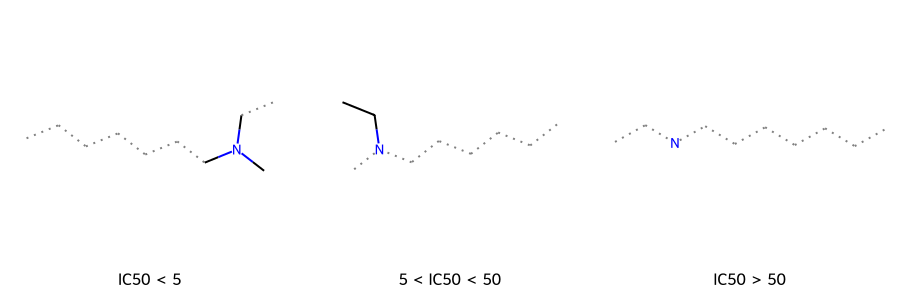

In [25]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

# Use the filtered ones with the low IC50 values
# Compare this to structures with different IC50 values

# Make Three Range Regions

# 1. IC50 < 1
# 2. 1 < IC50 < 50
# 3. IC50 > 50

# Filter the Dataframe
lower_bound = 5
upper_bound = 50

filtered_df_1 = target_d2_recept[(target_d2_recept['IC50'] < upper_bound) & (target_d2_recept['IC50'] > lower_bound)]
filtered_df_2 = target_d2_recept[(target_d2_recept['IC50'] < lower_bound)]
filtered_df_3 = target_d2_recept[(target_d2_recept['IC50'] > upper_bound)]

# Now calculate the MCS in each case

# 1. IC50 < 1
mols_filtered_1 = [Chem.MolFromSmiles(smiles) for smiles in filtered_df_1["smiles"]]
mcs_1 = rdFMCS.FindMCS(mols_filtered_1, threshold=0.8)
mcs_mol_1 = [Chem.MolFromSmarts(mcs_1.smartsString)]

# 2. 1 < IC50 < 50
mols_filtered_2 = [Chem.MolFromSmiles(smiles) for smiles in filtered_df_2["smiles"]]
mcs_2 = rdFMCS.FindMCS(mols_filtered_2, threshold=0.8)
mcs_mol_2 = [Chem.MolFromSmarts(mcs_2.smartsString)]

# 3. IC50 > 50
mols_filtered_3 = [Chem.MolFromSmiles(smiles) for smiles in filtered_df_3["smiles"]]
mcs_3 = rdFMCS.FindMCS(mols_filtered_3, threshold=0.8)
mcs_mol_3 = [Chem.MolFromSmarts(mcs_3.smartsString)]

# Combine into one list and draw

mcs_mol = mcs_mol_1 + mcs_mol_2 + mcs_mol_3

# Label the MCS
labels = [f"IC50 < {lower_bound}", f"{lower_bound} < IC50 < {upper_bound}", f"IC50 > {upper_bound}"]



Draw.MolsToGridImage(mcs_mol, molsPerRow=3, subImgSize=(300, 300), legends=labels)

#### Descriptors Calulation

What we will do here is try out the PCA approach

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans



In [27]:
# Iterate over the target_df and calculate the descriptors

for index, row in target_d2_recept.iterrows():
    mol = Chem.MolFromSmiles(row["smiles"])
    target_d2_recept.loc[index, "MolWt"] = Descriptors.MolWt(mol)
    target_d2_recept.loc[index, "TPSA"] = Descriptors.TPSA(mol)
    target_d2_recept.loc[index, "HBD"] = Descriptors.NumHDonors(mol)
    target_d2_recept.loc[index, "HBA"] = Descriptors.NumHAcceptors(mol)
    target_d2_recept.loc[index, "LogP"] = Descriptors.MolLogP(mol)
    target_d2_recept.loc[index, "nRotB"] = Descriptors.NumRotatableBonds(mol)
target_d2_recept.head()


,molecule_chembl_id,IC50,units,smiles,ROMol,molecule_name,MolWt,TPSA,HBD,HBA,LogP,nRotB
0,CHEMBL303519,9800.0,nM,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b06bba0>,CHEMBL303519,342.446,32.26,0.0,4.0,3.3700,3.0
1,CHEMBL292943,50.0,nM,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b06bc10>,CHEMBL292943,360.461,41.49,0.0,5.0,3.4744,5.0
2,CHEMBL61682,25.0,nM,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b0312e0>,CHEMBL61682,365.427,19.37,0.0,3.0,4.3490,4.0
3,CHEMBL64487,360.0,nM,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,<rdkit.Chem.rdchem.Mol object at 0x7f458b031270>,CHEMBL64487,360.461,41.49,0.0,5.0,3.4744,5.0
4,CHEMBL64597,300.0,nM,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,<rdkit.Chem.rdchem.Mol object at 0x7f458b031350>,CHEMBL64597,336.464,32.26,0.0,5.0,3.5273,4.0


In [28]:
descriptors = target_d2_recept.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values

# Standardize the data

descriptors_std = StandardScaler().fit_transform(descriptors)

pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)


In [29]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = target_d2_recept.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.494238,0.133576,-0.538115,0.003986,0.038769,-0.033812
1,-0.985687,0.143803,-0.779801,0.178193,0.196062,-0.101816
2,-1.534635,-0.575452,-0.222068,0.099554,-0.045655,0.026829
3,-0.985687,0.143803,-0.779801,0.178193,0.196062,-0.101816
4,-1.232347,0.107985,-0.740379,0.054465,0.342306,-0.002376
5,-1.534635,-0.575452,-0.222068,0.099554,-0.045655,0.026829
6,-1.362345,-0.021130,-0.519995,0.122975,0.067836,-0.059246
7,-1.362345,-0.021130,-0.519995,0.122975,0.067836,-0.059246
8,-1.122145,0.446912,-0.821688,0.099063,0.128756,-0.118694
9,-1.494238,0.133576,-0.538115,0.003986,0.038769,-0.033812


[0.6753363  0.18927779 0.07576805 0.04018644 0.01265138 0.00678003]
1.0000000000000002


<Figure size 800x600 with 0 Axes>

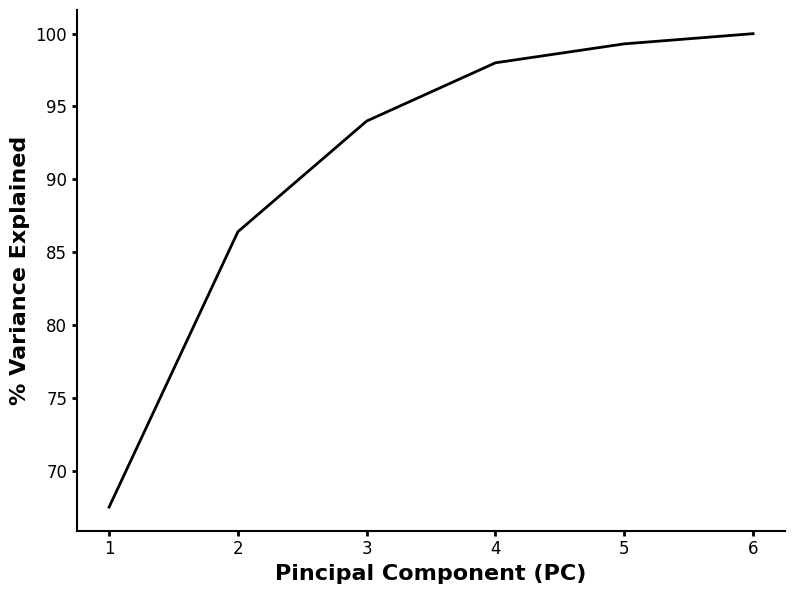

In [30]:
# Calculate the variance ratio

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

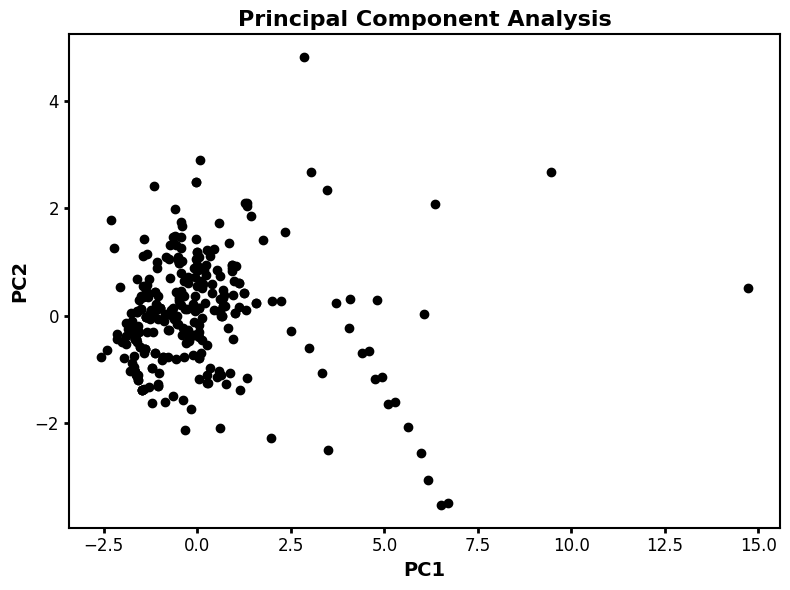

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()



In [32]:
# For the Clustering normalice the PCA to vary from -1 to 1

# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]



In [111]:


# Add the compound names to this table
descriptors_pca['molecule_name'] = target_d2_recept['molecule_name']


# check the values for aririprazole
descriptors_pca[descriptors_pca['molecule_name'] == 'ARIPIPRAZOLE']

,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized,Cluster,Cluster_PC1_PC2,molecule_name
222,-0.214678,-0.477809,0.137261,0.134522,-0.014437,0.009767,-0.012422,-0.057088,1,0,ARIPIPRAZOLE


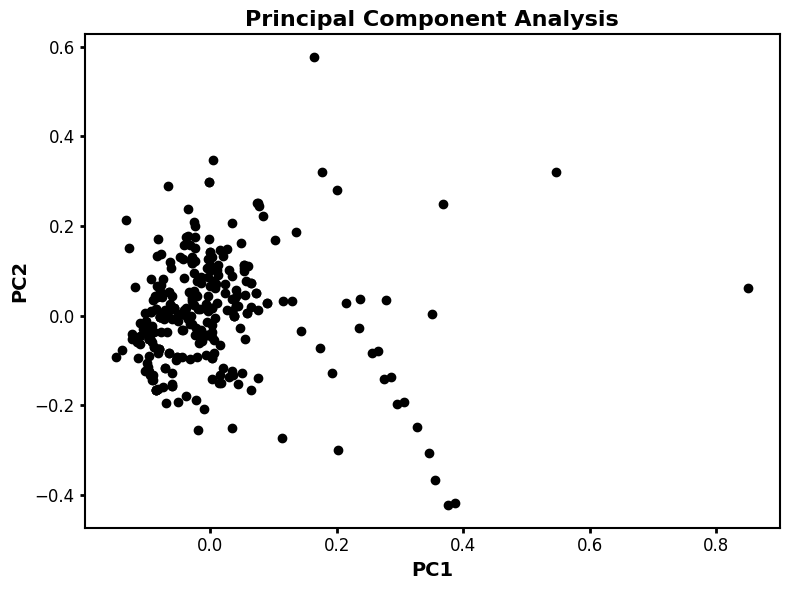

In [112]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


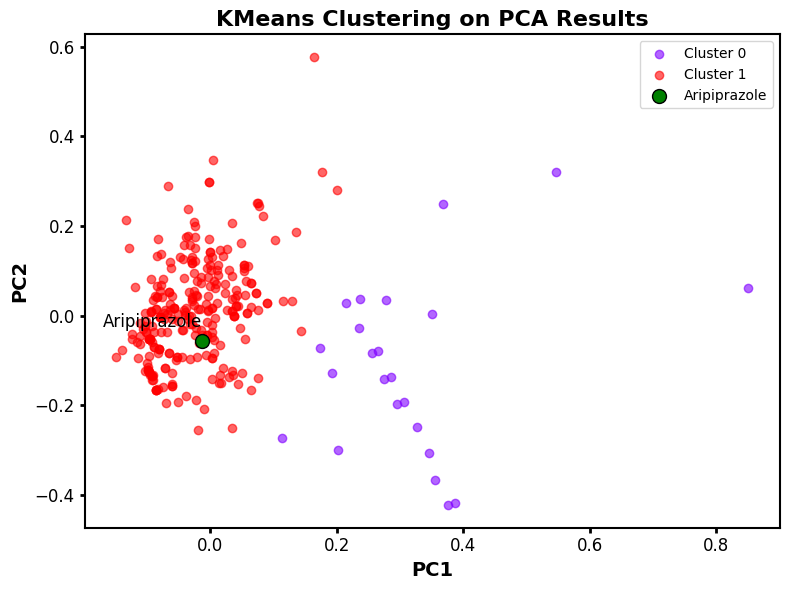

In [137]:
# Define the number of clusters
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(descriptors_pca[['PC1_normalized', 'PC2_normalized']])

# Add the cluster labels to the DataFrame
descriptors_pca['Cluster'] = clusters

# Visualize the clustering results
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0, 1, num_clusters))
for cluster in range(num_clusters):
    cluster_data = descriptors_pca[descriptors_pca['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1_normalized'], cluster_data['PC2_normalized'], 
               color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

# Highlight and annotate the compound named Aripiprazole
for index, row in descriptors_pca.iterrows():
    if row["molecule_name"] == "ARIPIPRAZOLE":
        ax.scatter(row['PC1_normalized'], row['PC2_normalized'], color='green', edgecolor='black', s=100, label='Aripiprazole')
        ax.annotate('Aripiprazole', (row['PC1_normalized'], row['PC2_normalized']),
                    textcoords="offset points", xytext=(0,10), ha='right', fontsize=12, color='black')

ax.set_title('KMeans Clustering on PCA Results', fontsize=16, fontweight='bold', family='sans-serif')
ax.set_xlabel('PC1', fontsize=14, fontweight='bold')
ax.set_ylabel('PC2', fontsize=14, fontweight='bold')
ax.legend()
plt.tick_params('both', width=2, labelsize=12)
plt.tight_layout()
plt.show()

/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

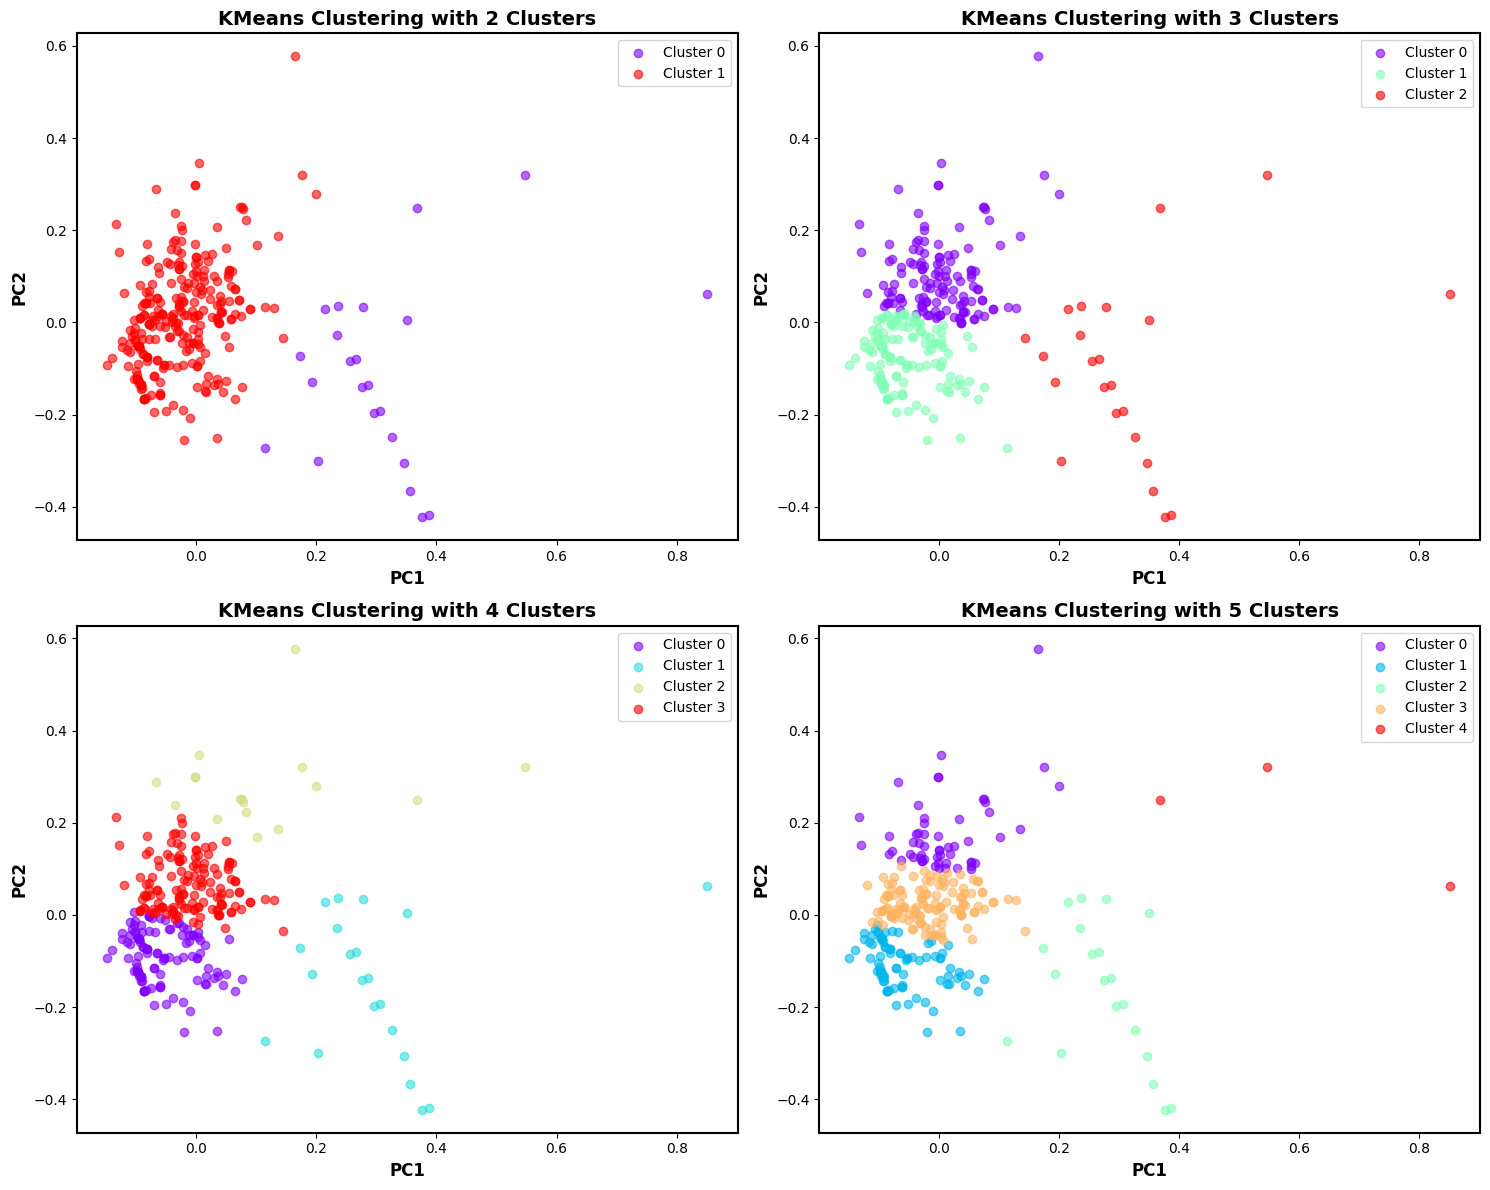

In [141]:
# Define the number of clusters for each subplot
cluster_counts = [2, 3, 4, 5]

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each cluster count and create a subplot
for ax, num_clusters in zip(axes, cluster_counts):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(descriptors_pca[['PC1_normalized', 'PC2_normalized']])
    
    # Add the cluster labels to the DataFrame
    descriptors_pca['Cluster'] = clusters
    
    # Visualize the clustering results
    colors = cm.rainbow(np.linspace(0, 1, num_clusters))
    for cluster in range(num_clusters):
        cluster_data = descriptors_pca[descriptors_pca['Cluster'] == cluster]
        ax.scatter(cluster_data['PC1_normalized'], cluster_data['PC2_normalized'], 
                   color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)
    
    ax.set_title(f'KMeans Clustering with {num_clusters} Clusters', fontsize=14, fontweight='bold')
    ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
    ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

In [142]:

kmeans = KMeans(n_clusters=2, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

descriptors_pca['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=target_d2_recept.index)
descriptors_pca.head()

/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized,Cluster,Cluster_PC1_PC2,molecule_name
0,-1.494238,0.133576,-0.538115,0.003986,0.038769,-0.033812,-0.086459,0.015960,3,0,CHEMBL303519
1,-0.985687,0.143803,-0.779801,0.178193,0.196062,-0.101816,-0.057034,0.017181,3,0,CHEMBL292943
2,-1.534635,-0.575452,-0.222068,0.099554,-0.045655,0.026829,-0.088797,-0.068755,1,0,CHEMBL61682
3,-0.985687,0.143803,-0.779801,0.178193,0.196062,-0.101816,-0.057034,0.017181,3,0,CHEMBL64487
4,-1.232347,0.107985,-0.740379,0.054465,0.342306,-0.002376,-0.071306,0.012902,3,0,CHEMBL64597


<Figure size 1000x800 with 0 Axes>

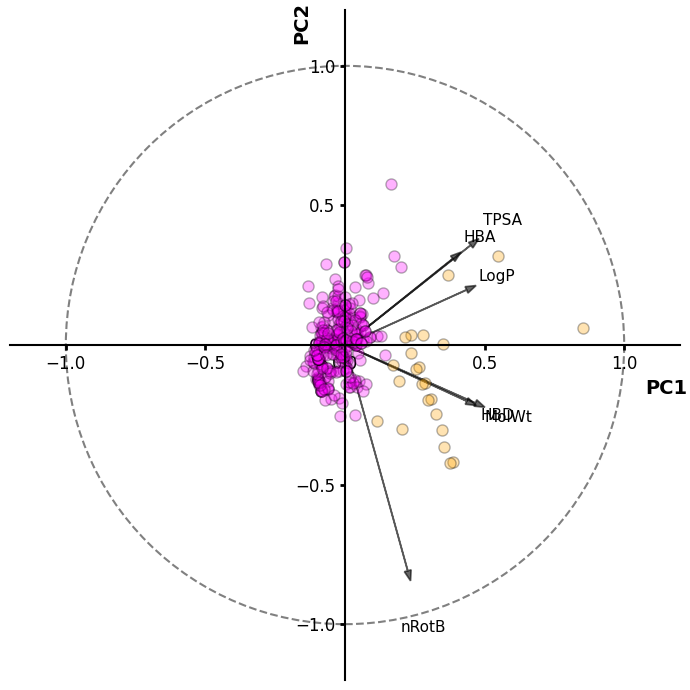

In [146]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index:
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)


plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=["MolWt",	"TPSA",	"HBD"	,"HBA"	,"LogP",	"nRotB"] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()



# Tanimoto Similarity Index

Calculation of the Tanimoto Similarity index and comparison with the compound of interest

In [152]:
from matplotlib import pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem, Draw
from rdkit import DataStructs
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

In [165]:
# Make mols with smiles in target_d2_recept
# and add to dataframe

target_d2_recept['mol'] = [Chem.MolFromSmiles(smiles) for smiles in target_d2_recept['smiles']]



fpgen = AllChem.GetRDKitFPGenerator()

fps = [fpgen.GetFingerprint(m) for m in target_d2_recept['mol']]

tanimoto_distances = []
dice_distances = []

# calulate all tanimoto differences

aripiprazole = target_d2_recept[target_d2_recept['molecule_name'] == 'ARIPIPRAZOLE'].index[0]

ref = fps[aripiprazole]

# Calculate the Tanimoto and Dice similarity between the reference compound and all others
for i, fp in enumerate(fps):
    tanimoto = DataStructs.FingerprintSimilarity(ref, fp, metric=DataStructs.TanimotoSimilarity)
    dice = DataStructs.FingerprintSimilarity(ref, fp, metric=DataStructs.DiceSimilarity)
    tanimoto_distances.append(tanimoto)
    dice_distances.append(dice)


[0.27187765505522515, 0.25853658536585367, 0.2965641952983725, 0.27281191806331473, 0.23149015932521086, 0.2917054986020503, 0.2193486590038314, 0.2638522427440633, 0.22920353982300884, 0.2561492790500424, 0.3358139534883721, 0.22460391425908668, 0.26024785510009535, 0.22117202268431002, 0.29732065687121867, 0.2919020715630885, 0.25517241379310346, 0.4860335195530726, 0.30396825396825394, 0.3405128205128205, 0.42244224422442245, 0.43431053203040176, 0.45408163265306123, 0.5480549199084668, 0.4860335195530726, 0.44136460554371004, 0.49037372593431483, 0.5234375, 0.2844311377245509, 0.459954233409611, 0.4230769230769231, 0.29780564263322884, 0.48333333333333334, 0.46405228758169936, 0.39473684210526316, 0.4874141876430206, 0.47415730337078654, 0.4358974358974359, 0.4830508474576271, 0.5502232142857143, 0.43431053203040176, 0.43431053203040176, 0.4973821989528796, 0.4383408071748879, 0.4609286523216308, 0.45666666666666667, 0.42972699696663297, 0.2907986111111111, 0.3202202989771833, 0.30

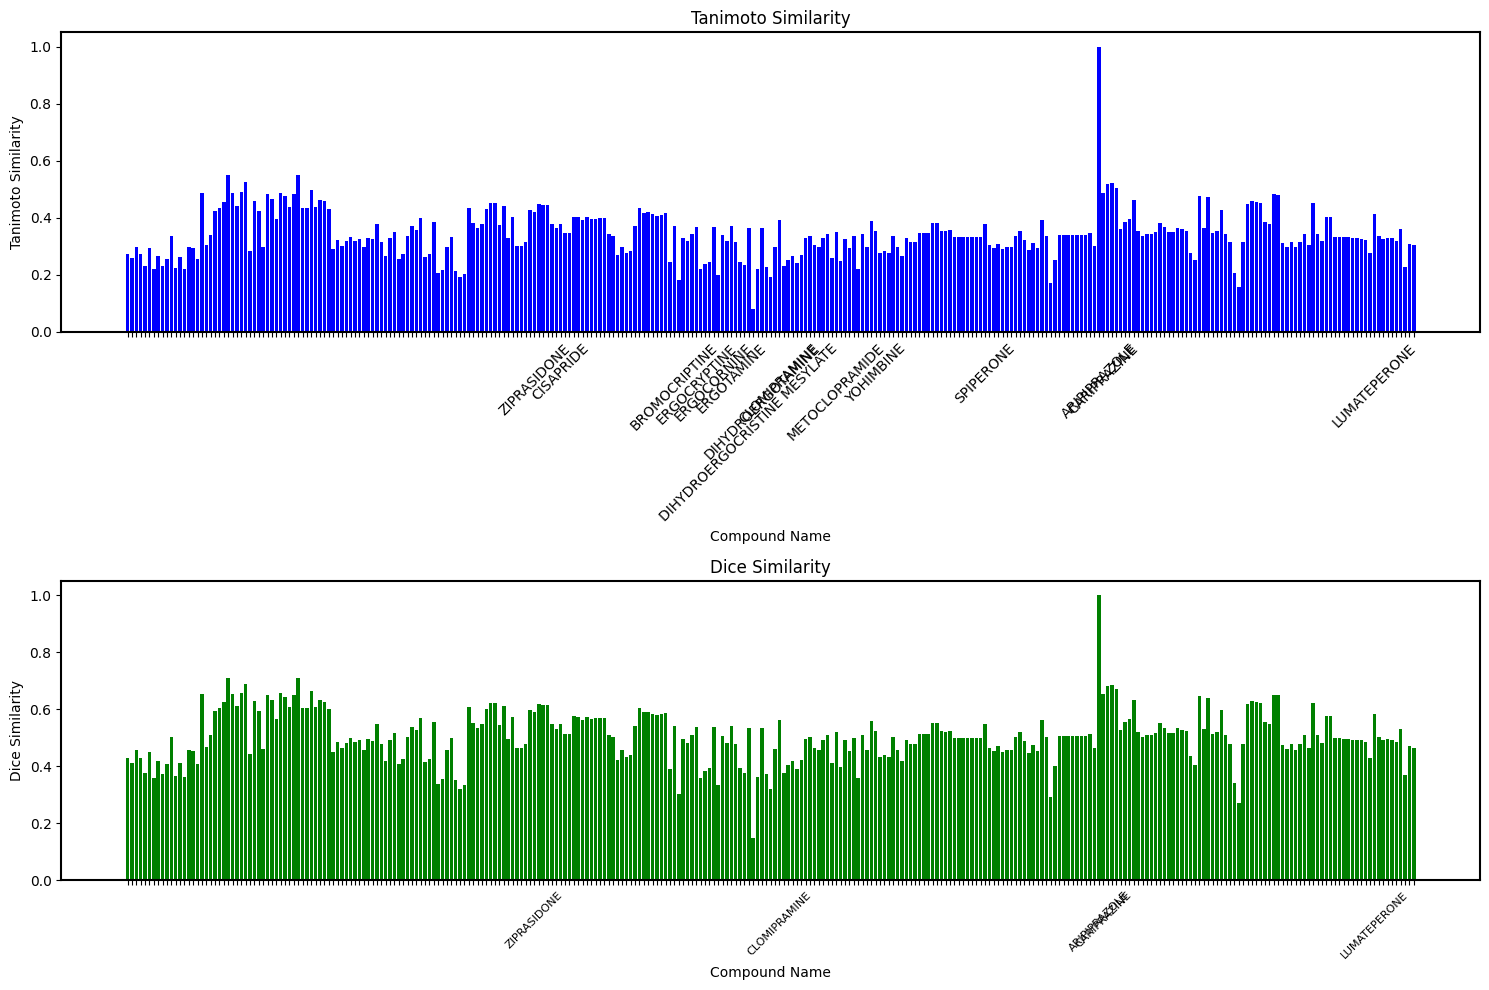

In [183]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot Tanimoto similarity
bars1 = axes[0].bar(target_d2_recept['molecule_name'], tanimoto_distances, color='blue')
axes[0].set_title('Tanimoto Similarity')
axes[0].set_xlabel('Compound Name')
axes[0].set_ylabel('Tanimoto Similarity')
axes[0].tick_params(axis='x', rotation=45)

# Plot Dice similarity
bars2 = axes[1].bar(target_d2_recept['molecule_name'], dice_distances, color='green')
axes[1].set_title('Dice Similarity')
axes[1].set_xlabel('Compound Name')
axes[1].set_ylabel('Dice Similarity')
axes[1].tick_params(axis='x', rotation=45,labelsize=8)

# Hide labels for bars representing ChEMBL IDs and conditionally label bars
for tick, name, tanimoto, dice in zip(axes[0].get_xticklabels(), target_d2_recept['molecule_name'], tanimoto_distances, dice_distances):
    if name.startswith('CHEMBL') or tanimoto < 0.35:
        tick.set_visible(False)

for tick, name, tanimoto, dice in zip(axes[1].get_xticklabels(), target_d2_recept['molecule_name'], tanimoto_distances, dice_distances):
    if name.startswith('CHEMBL') or dice < 0.55:
        tick.set_visible(False)


plt.tight_layout()
plt.show()